# Analysis for Vanguard S&P 500 Index ETF (VFV.TO)

Data exported from: https://ca.finance.yahoo.com/quote/VFV.TO/history/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load data csv data with headers
df = pd.read_csv('data/VFV.TO.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=False)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2948,2024-08-09,129.600006,130.500000,129.259995,130.220001,130.220001,208500
2947,2024-08-08,128.139999,129.820007,127.870003,129.690002,129.690002,199500
2946,2024-08-07,129.279999,129.940002,126.739998,126.879997,126.879997,405600
2945,2024-08-06,127.980003,129.710007,127.000000,128.100006,128.100006,751500
2944,2024-08-02,132.000000,132.259995,130.330002,131.470001,131.470001,905400


In [8]:
# Consider Net return for buying $1000 worth of XIC.TO every 1st day of each month over the last 1 year, 5 years, 10 years, 15 years, 20 years
end_year = 2023
yearly_inflation_rate = 0.02  # yearly inflation rate


def calculate_returns(number_of_years, current_investment=1000):
    start_year = end_year - number_of_years + 1
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-01'
    # Filter the first record within each month between start_date and end_date
    df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df_filtered = df_filtered.groupby(pd.Grouper(key='Date', freq='MS')).first().reset_index()
    df_filtered = df_filtered.sort_values(by='Date', ascending=True)

    historical_gains = []

    total_invested = 0
    total_quantity = 0
    residual_cash = 0
    for index, row in df_filtered.iterrows():
        monthly_investment = current_investment / (1 + yearly_inflation_rate) ** (end_year - row['Date'].year)
        avg_price = ((row['High'] - row['Low']) / 2) + row['Low']
        amount_to_invest = monthly_investment + residual_cash
        purchasable_quantity = amount_to_invest // avg_price
        amount_spent = purchasable_quantity * avg_price
        total_invested += amount_spent
        residual_cash = amount_to_invest - amount_spent
        total_quantity += purchasable_quantity
        unrealized_gains = (total_quantity * avg_price) - total_invested
        historical_gains.append({
            'date': row['Date'],
            'amount_invested': round(monthly_investment, 2),
            'share_price': round(avg_price, 2),
            'purchased_quantity': purchasable_quantity,
            'accumulated_quantity': total_quantity,
            'residual_cash': round(residual_cash, 2),
            'total_invested': round(total_invested, 2),
            'unrealized_gains': round(unrealized_gains, 2)
        })
    return historical_gains


one_year_returns = calculate_returns(1)
five_year_returns = calculate_returns(5)
ten_year_returns = calculate_returns(10)

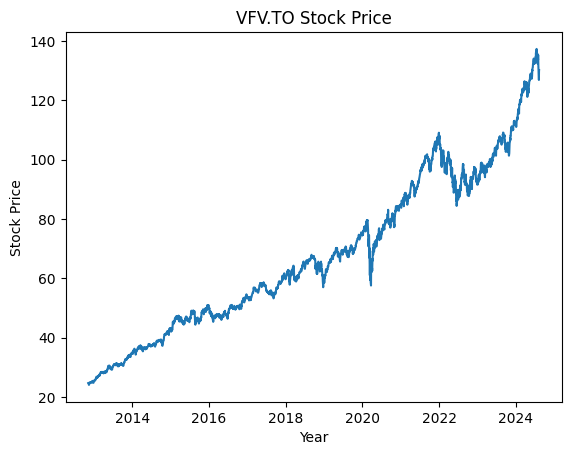

In [9]:
# Plot stock price over the years
plt.plot(df['Date'], df['Close'])
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('VFV.TO Stock Price')
plt.show()

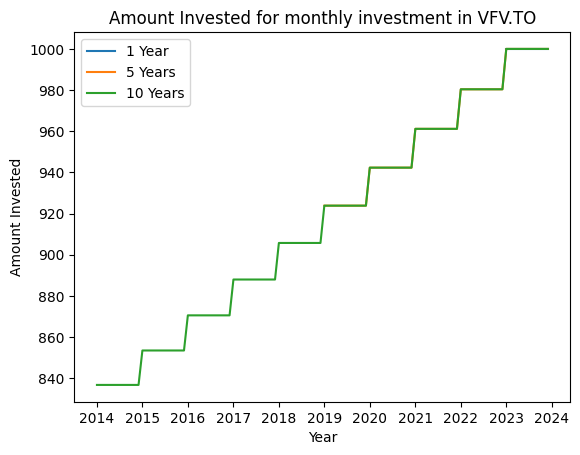

In [10]:
# Monthly amount_invested over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns]:
    plt.plot([x['date'] for x in returns], [x['amount_invested'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years'])
plt.xlabel('Year')
plt.ylabel('Amount Invested')
plt.title('Amount Invested for monthly investment in VFV.TO')
plt.show()

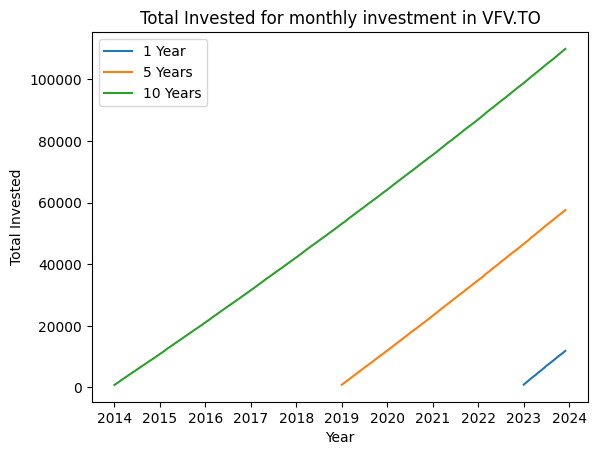

In [11]:
# Plot monthly total investment over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns]:
    plt.plot([x['date'] for x in returns], [x['total_invested'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years'])
plt.xlabel('Year')
plt.ylabel('Total Invested')
plt.title('Total Invested for monthly investment in VFV.TO')
plt.show()

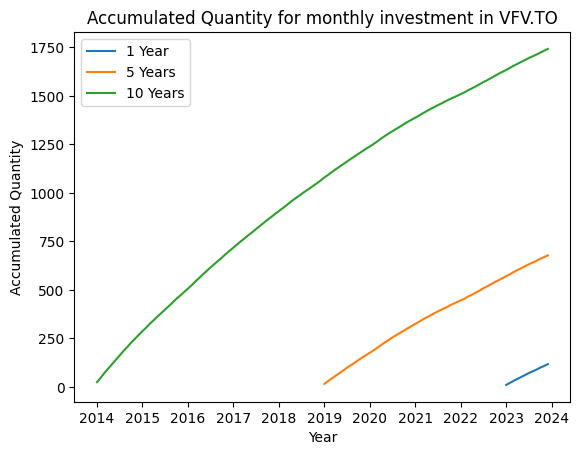

In [12]:
# Accumulated shares quantity over the years
for returns in [one_year_returns, five_year_returns, ten_year_returns]:
    plt.plot([x['date'] for x in returns], [x['accumulated_quantity'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years'])
plt.xlabel('Year')
plt.ylabel('Accumulated Quantity')
plt.title('Accumulated Quantity for monthly investment in VFV.TO')
plt.show()

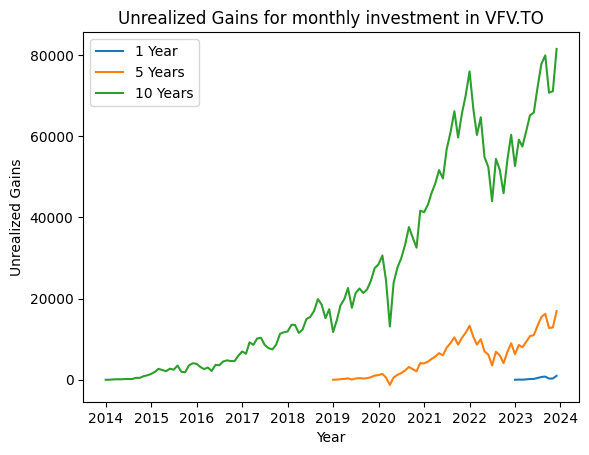

In [13]:
# Plot unrealized gains on the left y axis and total invested on the right y axis
for returns in [one_year_returns, five_year_returns, ten_year_returns]:
    plt.plot([x['date'] for x in returns], [x['unrealized_gains'] for x in returns])

plt.legend(['1 Year', '5 Years', '10 Years'])
plt.xlabel('Year')
plt.ylabel('Unrealized Gains')
plt.title('Unrealized Gains for monthly investment in VFV.TO')
plt.show()

In [14]:
for year, data in zip([1, 5, 10], [one_year_returns, five_year_returns, ten_year_returns]):
    print(f"{year} Year")
    print(f"Unrealized Gains: {data[-1]['unrealized_gains']} CAD")
    print(f"Total Invested: {data[-1]['total_invested']} CAD")
    print(f"Accumulated Quantity: {data[-1]['accumulated_quantity']} units")
    print(f"Return on Investment: {round((data[-1]['unrealized_gains'] / data[-1]['total_invested']) * 100, 2)}%")

1 Year
Unrealized Gains: 964.3 CAD
Total Invested: 11895.17 CAD
Accumulated Quantity: 117.0 units
Return on Investment: 8.11%
5 Year
Unrealized Gains: 16915.51 CAD
Total Invested: 57603.46 CAD
Accumulated Quantity: 678.0 units
Return on Investment: 29.37%
10 Year
Unrealized Gains: 81536.51 CAD
Total Invested: 109926.7 CAD
Accumulated Quantity: 1742.0 units
Return on Investment: 74.17%
